In [ ]:
import pandas as pd

df = pd.read_csv('RVNL.BO.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-11,19.000000,19.750000,18.600000,19.049999,18.561163,11152230.0
1,2019-04-12,19.200001,19.850000,19.200001,19.750000,19.243200,3330561.0
2,2019-04-15,19.950001,23.700001,19.900000,23.650000,23.043123,10795990.0
3,2019-04-16,24.750000,26.950001,24.200001,25.600000,24.943087,10874870.0
4,2019-04-18,26.250000,26.850000,25.150000,26.150000,25.478973,5313229.0
...,...,...,...,...,...,...,...
1273,2024-06-10,383.500000,386.500000,369.299988,373.799988,373.799988,1279858.0
1274,2024-06-11,382.000000,392.350006,378.899994,389.450012,389.450012,2186159.0
1275,2024-06-12,390.450012,397.000000,389.100006,392.000000,392.000000,2269627.0
1276,2024-06-13,394.950012,395.950012,386.000000,390.350006,390.350006,811705.0


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2019-04-11,19.049999
1,2019-04-12,19.750000
2,2019-04-15,23.650000
3,2019-04-16,25.600000
4,2019-04-18,26.150000
...,...,...
1273,2024-06-10,373.799988
1274,2024-06-11,389.450012
1275,2024-06-12,392.000000
1276,2024-06-13,390.350006


In [ ]:
df['Date']

0       2019-04-11
1       2019-04-12
2       2019-04-15
3       2019-04-16
4       2019-04-18
           ...    
1273    2024-06-10
1274    2024-06-11
1275    2024-06-12
1276    2024-06-13
1277    2024-06-14
Name: Date, Length: 1278, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2024-06-11')
datetime_object

datetime.datetime(2024, 6, 11, 0, 0)

In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-36-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2019-04-11
1      2019-04-12
2      2019-04-15
3      2019-04-16
4      2019-04-18
          ...    
1273   2024-06-10
1274   2024-06-11
1275   2024-06-12
1276   2024-06-13
1277   2024-06-14
Name: Date, Length: 1278, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2019-04-11,19.049999
2019-04-12,19.750000
2019-04-15,23.650000
2019-04-16,25.600000
2019-04-18,26.150000
...,...
2024-06-10,373.799988
2024-06-11,389.450012
2024-06-12,392.000000


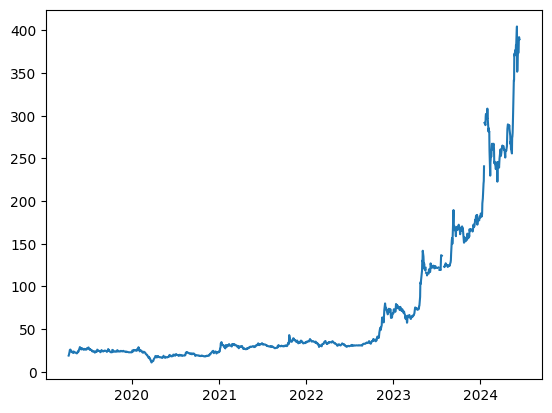

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,30.299999,30.400000,27.700001,27.750000
1,2021-03-26,30.400000,27.700001,27.750000,29.200001
2,2021-03-30,27.700001,27.750000,29.200001,29.600000
3,2021-03-31,27.750000,29.200001,29.600000,29.100000
4,2021-04-01,29.200001,29.600000,29.100000,29.650000
...,...,...,...,...,...
241,2022-03-16,32.750000,32.650002,32.799999,33.150002
242,2022-03-17,32.650002,32.799999,33.150002,34.549999
243,2022-03-21,32.799999,33.150002,34.549999,35.799999
244,2022-03-22,33.150002,34.549999,35.799999,35.799999


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((246,), (246, 3, 1), (246,))

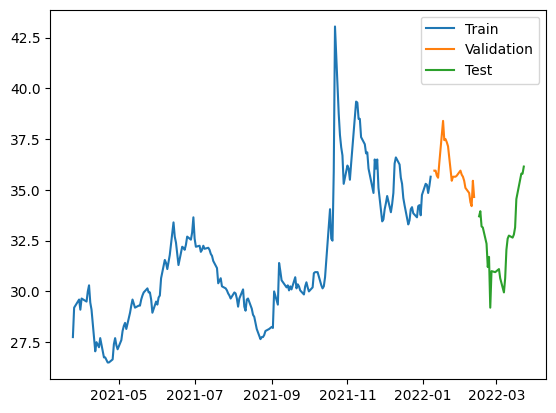

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 123ms/step - loss: 1001.0750 - mean_absolute_error: 31.4881 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 962.3307 - mean_absolute_error: 30.8678 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 924.9626 - mean_absolute_error: 30.2553 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 876.2864 - mean_absolute_error: 29.4350 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 811.3881 - mean_absolute_error: 28.3101 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 722.1648 - mean_absolute_error: 26.6798 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7/100
7/7 [===========================

7/7 [==============================] - 3s 4ms/step


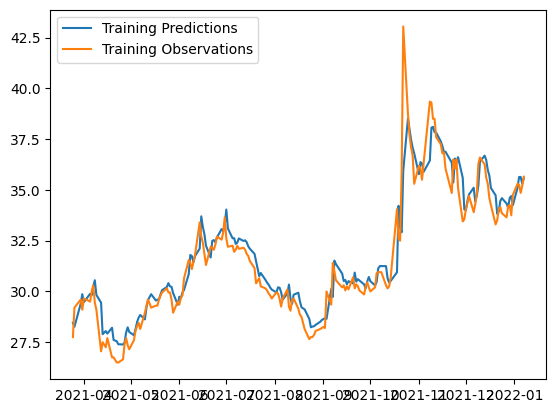

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 71ms/step


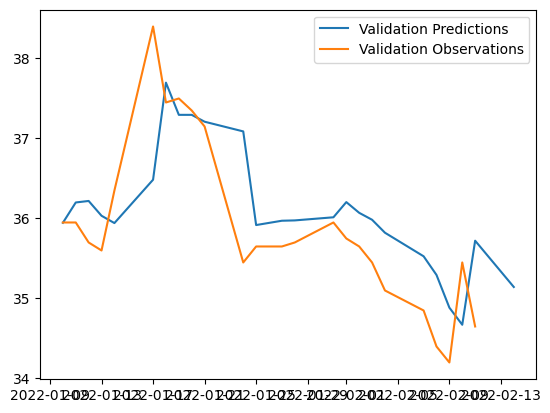

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 69ms/step


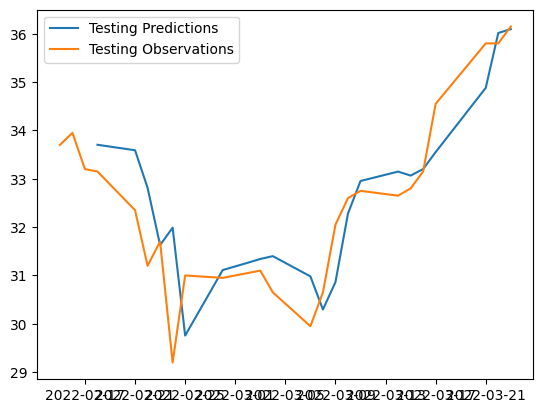

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

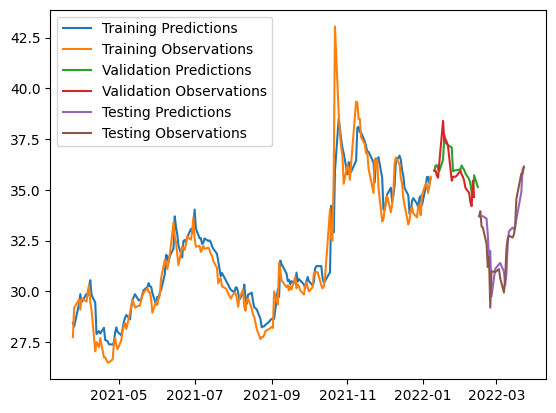

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])